In [15]:
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import pandas as pd

REPO_NAME = "cvpr_perturbations"
repo_root = None
cwd = Path.cwd().resolve()
for path in (cwd, *cwd.parents):
    if path.name == REPO_NAME:
        repo_root = path
        break
if repo_root is None:
    raise RuntimeError(
        f"Unable to locate '{REPO_NAME}' in the current working tree; adjust REPO_NAME or run from project root."
    )
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

from notebooks.utils.single_epoch_dneural import plot_single_epoch_delta_neural_alignment

In [16]:
baseline_seed1_na_results = pd.read_csv('../../data/brain_rsa_results/baseline/things/things_baseline_seed1_brain_rsa_results.csv')

baseline_seed2_na_results = pd.read_csv('../../data/brain_rsa_results/baseline/things/things_baseline_seed2_brain_rsa_results.csv')

baseline_seed3_na_results = pd.read_csv('../../data/brain_rsa_results/baseline/things/things_baseline_seed3_brain_rsa_results.csv')

In [17]:
sweep_seed1_na_results = pd.read_csv(
    repo_root
    / "data"
    / "brain_rsa_results"
    / "single_epoch_sweep"
    / "things"
    / "things_sweep_seed42_brain_rsa_results.csv"
)

In [18]:
print(sweep_seed1_na_results.head())

   training_run  epoch   roi       rho        p_value
0             1      1  va-1  0.032243   1.668004e-60
1             1      1  va-2  0.036750   4.647880e-78
2             1      1  va-3  0.071093  3.539635e-287
3             1      1   LOC  0.040813   7.631505e-96
4             2      2  va-1 -0.014010   1.017080e-12


(<Figure size 1600x300 with 4 Axes>,
 {'LOC':           run_name  perturbation_epoch  delta_neural_alignment  \
  0    training_run1                   1               -0.019862   
  1    training_run2                   2               -0.008189   
  2    training_run3                   3               -0.030272   
  3    training_run4                   4               -0.055122   
  4    training_run5                   5               -0.088448   
  ..             ...                 ...                     ...   
  92  training_run94                  94               -0.204942   
  93  training_run95                  95               -0.185906   
  94  training_run96                  96               -0.188401   
  95  training_run97                  97               -0.184414   
  96  training_run98                  98               -0.196919   
  
      perturbed_neural_alignment  baseline_neural_alignment  
  0                     0.040813                   0.060676  
  1          

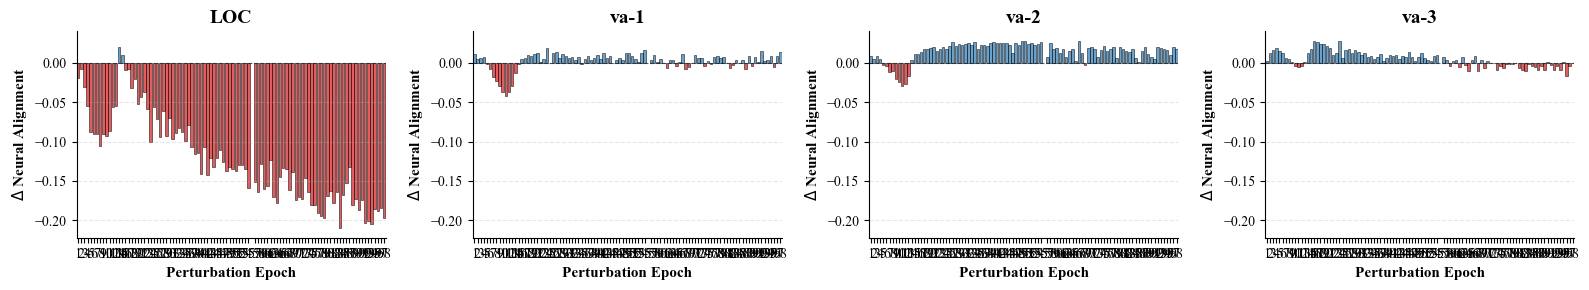

In [19]:
plot_single_epoch_delta_neural_alignment(
    baseline_seed1_na_results,
    sweep_seed1_na_results,
    perturbed_runs_is_mapping=False,
    plot_rois=['LOC', 'va-1', 'va-2', 'va-3']
)